# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Jessica de Leeuw| 1274544|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [14]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer,max_offer+.1,.1)
offers

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])

**I first defined the smallest and largest offer someone can make. Then I created a list, 'offers', with step 0.1 with the np.arange function. I put +0.1 after max_offer, because the last value is excluded. **

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [9]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

** I first defined the function accept_offer, which depends on the offer that is made and the outside option of the player who decided whether to accept the offer or not. It determines whether an offer is acceptable or not. You only accept the offer if it is equal or greater than your outside option.**

**Then I introduced the make_offer function, which depends on the outside options for both players. It returns a list with your offer, your profit and the other profit. Your offer is -1 if no offer is made.**

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [17]:
offer = {}

** I made a dictionary offer.**

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [18]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer

** The offer in the (n-i)th period is the offer made by the active player to the other player. The active player's outside option is given by offer[n-i+1][2] (last entry of offer[n-i+1]) times delta and the other player's outside option is given by offer[n-i+1][1] (second entry of offer[n-i+1]) times delta. **

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [6]:
delta = 0.9
n = 1
outcome(n,delta)

{1: (0.0, 10.0, 0.0), 2: [0, 0, 0]}

In [7]:
delta = 0.9
n = 2
outcome(n,delta)

{1: (9.0, 1.0, 9.0), 2: (0.0, 10.0, 0.0), 3: [0, 0, 0]}

In [19]:
delta = 0.9
n = 3
outcome(n,delta)

{1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002),
 2: (9.0, 1.0, 9.0),
 3: (0.0, 10.0, 0.0),
 4: [0, 0, 0]}

** These outcomes are the same as we have seen in the lecture and tutorial before.**

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

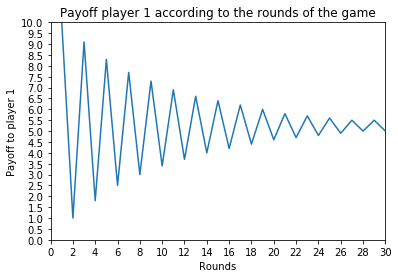

In [9]:
n = 30
delta = 0.9
range_n = np.arange(1,n+1,1)
x = [i for i in range_n]
y = [outcome(i,delta)[1][1] for i in x]
plt.plot(x,y)
plt.xlim(0,30)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.xlabel("Rounds")
plt.ylim(0.0,10.0)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.ylabel("Payoff to player 1")
plt.title("Payoff player 1 according to the rounds of the game")

** For the x-axis I used range_n. For the y-axis I used the formula of outcome and selected the payoff to player 1 only. I plotted the graph using plt.plot(x,y). plt.xlim and plt.ylim give the limits of the axes. plt.xticks and plt.yticks give the ticks on the axes. With plt.xlabel and plt.ylabel I named the axes. Finally I gave the graph a name with plt.title.**

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

**Answer: First I can see that the graph has a Zig Zag pattern. This is because, for a game with uneven rounds player 1 can make the last offer, so that's in favor of player 1. In a game with even rounds player 2 can make the last offer, so that's in favor of player 2. I can also see that the payoff for player 1 is coming closer to the middle (5 in even rounds and 5.5 in uneven rounds). This is because of the delta. The more rounds you have, the closer your_outside_option and other_outside_option become. This is because the payoffs are discounted with the discount factor (delta). Both players want at least their outside option.**